## Data Analysis Education levels Project 

#### For this Project, the 10 States I have chosen are: Connecuticut, Louisiana, Massachusetts, Mississippi, Nevada, New Jersey, New Mexico, Oregon, Utah, Wisconsin. 

#### I Chosed these US States based on population count, political ideology, and the culture of these US states based on if they are Rural or Urban. 

##### Warning: Running all the code below will save 10 dataframes from 10 different states in the census folder. 

##### This notebook as is will only work on google colab, and for someone who has downloaded the data and code files onto a folder name "census" on their Google Drive.

In the first step, I mount my datafiles onto my google drive so I can begin making dataframes state by state. 

In [1]:
import importlib.util
import os.path
from google.colab import drive

drive.mount('/content/gdrive') 
code_dir ='/content/gdrive/My Drive/census/'

filename = os.path.join(code_dir, 'read_in_census_data.py')
spec = importlib.util.spec_from_file_location("census", filename)
# Name for imported module will be census
census = importlib.util.module_from_spec(spec)
spec.loader.exec_module(census)
data_dir = code_dir
data_dictionary = os.path.join(data_dir,
                               '5_PUMS_record_layout.xls')
ci = census.CensusInfo (data_dictionary)
df = census.DataFrameWrapper(ci)

Mounted at /content/gdrive
Processing 'Housing Unit Record' Sheet

Processing 'Person Record' Sheet



In [2]:
one_percent_data_file_conn = os.path.join(data_dir,
                                     'revisedpums1_09_connecticut.txt')
one_percent_data_file_louis = os.path.join(data_dir,
                                     'revisedpums1_22_louisiana.txt')
one_percent_data_file_mass = os.path.join(data_dir,
                                     'revisedpums1_25_massa.txt')
one_percent_data_file_miss = os.path.join(data_dir,
                                     'revisedpums1_28_mississippi.txt')
one_percent_data_file_neva = os.path.join(data_dir,
                                     'revisedpums1_32_nevada.txt')
one_percent_data_file_new_jer = os.path.join(data_dir,
                                     'revisedpums1_34_new_jersey.txt')
one_percent_data_file_new_mex = os.path.join(data_dir,
                                     'revisedpums1_35_new_mexico.txt')
one_percent_data_file_ore = os.path.join(data_dir,
                                     'revisedpums1_41_oregon.txt')
one_percent_data_file_utah = os.path.join(data_dir,
                                     'revisedpums1_49_utah.txt')
one_percent_data_file_wis = os.path.join(data_dir,
                                     'revisedpums1_55_wisconsin.txt')

Here, I import Pandas and Numpy to create the dataframe for each of the 10 US states, including the "Education Level" and "Income."

In [3]:
import pandas as pd
import numpy as np
dt_dict ={'serial_no':object,'race':object,'gender':object,'relationship':object}

#### In the example below, I demonstrate building the pandas dataframe for Connecticut, while also taking out education levels that are lower than 9 because anybody who is lower than a 9 is usually a middle schooler who aren't expected to make income by that point in their lives. 

In [4]:
ci.one_percent_file,one_percent_data_file_conn
df2 = census.DataFrameWrapper(ci)
df2.fill_frame ([], ci.person_record, one_percent_data_file_conn, ci.one_percent_file, \
                'race','education','income','gender','age')
df2.save_frame(os.path.join(data_dir,'conn_pums_extract.csv'),header=True)
conn_NA = pd.read_csv(os.path.join(data_dir,'conn_pums_extract.csv'),
                   dtype=dt_dict)
p_df_conn = conn_NA.dropna(subset=['income'])
p_df_conn = p_df_conn[p_df_conn['education']> 8]
p_df_conn

,serial_no,race,education,income,gender,age
0,0000117,47,14,95000.0,1,37
1,0000117,47,12,0.0,2,37
4,0000127,47,13,72000.0,2,37
5,0000134,47,15,150000.0,1,43
6,0000134,47,14,70000.0,2,43
...,...,...,...,...,...,...
34111,0999753,37,13,71000.0,2,53
34112,0999765,47,14,84000.0,1,56
34113,0999765,47,15,0.0,2,51
34116,0999826,37,9,0.0,1,42


In the code below, I label each of the education level into strings that represents each degree type, with those being as follows: 
####    AA  = Associate degree
####    BA  = Bachelor's degree
####    MA  = Master's degree
####    HD  = Professional degree or Doctorate Degree(Higher Degree)
####    HS  = High School Dipoma  

Then I make a new pandas dataframe with the state associated with the education level as the row and the income as the column. 

In [5]:
def education (x):
    if 9 <= x <= 11:
        return 'HS'
    elif x == 12:
        return 'AA'
    elif x == 13:
        return 'BA'
    elif x == 14:
        return 'MA'
    elif x > 14:
        return 'HD'
    else:
        return 'ND'
df_conn = p_df_conn[p_df_conn['income']>0]
df_conn['degrees'] = df_conn['education'].map(education)
df_conn2 = df_conn.loc[:,['degrees','income']]
df_conn2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,degrees,income
0,MA,95000.0
4,BA,72000.0
5,HD,150000.0
6,MA,70000.0
9,HS,17300.0
...,...,...
34106,AA,26700.0
34110,HS,65000.0
34111,BA,71000.0
34112,MA,84000.0


Below here, I use the new pandas dataframe to take the mean of all the data points out of each of the education levels, then make the new labels for Connecticut, and make a plot out of it. 

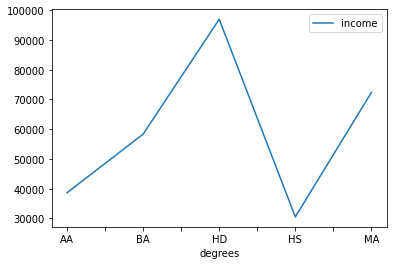

In [6]:
conn_group = df_conn2.groupby(['degrees'])
pt_conn = conn_group.mean()
pt_conn.plot()

#### Louisiana Example. In the code below, I do the same thing as Connecticut but for Louisiana, and this will happen for the other 8 US states as well. 

In [7]:
ci.one_percent_file,one_percent_data_file_louis
df3 = census.DataFrameWrapper(ci)
df3.fill_frame ([], ci.person_record, one_percent_data_file_louis, ci.one_percent_file, \
                'race','education','income','gender','age')
df3.save_frame(os.path.join(data_dir,'louis_pums_extract.csv'),header=True)
louis_NA = pd.read_csv(os.path.join(data_dir,'louis_pums_extract.csv'),
                   dtype=dt_dict)
p_df_louis = louis_NA.dropna(subset=['income'])
p_df_louis = p_df_louis[p_df_louis['education']>8]
p_df_louis

,serial_no,race,education,income,gender,age
0,0000117,37,9,14000.0,2,24
2,0000117,37,9,0.0,1,56
3,0000127,47,9,10000.0,2,50
4,0000195,47,9,32000.0,1,42
9,0000218,37,9,18200.0,1,49
...,...,...,...,...,...,...
44526,0999765,47,15,319000.0,1,49
44527,0999765,47,13,0.0,2,36
44532,0999820,47,12,18900.0,2,33
44533,0999826,47,9,9000.0,2,61


In [8]:
df_louis = p_df_louis[p_df_louis['income']>0]
df_louis['degrees'] = df_louis['education'].map(education)
df_louis2 = df_louis.loc[:,['degrees','income']]
df_louis2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,degrees,income
0,HS,14000.0
3,HS,10000.0
4,HS,32000.0
9,HS,18200.0
10,HS,10900.0
...,...,...
44519,HS,3600.0
44526,HD,319000.0
44532,AA,18900.0
44533,HS,9000.0


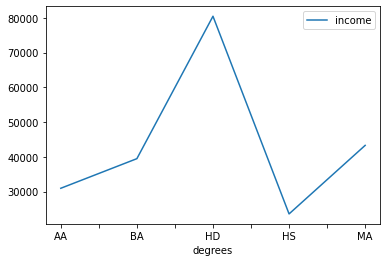

In [9]:
louis_group = df_louis2.groupby(['degrees'])
pt_louis = louis_group.mean()
pt_louis.plot()

### Massachusetts Example

In [10]:
df4 = census.DataFrameWrapper(ci)
df4.fill_frame ([], ci.person_record, one_percent_data_file_mass, ci.one_percent_file, \
                'race','education','income','gender','age')
df4.save_frame(os.path.join(data_dir,'mass_pums_extract.csv'),header=True)
mass_NA = pd.read_csv(os.path.join(data_dir,'mass_pums_extract.csv'),
                   dtype=dt_dict)
p_df_mass = mass_NA.dropna(subset=['income'])
p_df_mass = p_df_mass[p_df_mass['education']>8]
p_df_mass

,serial_no,race,education,income,gender,age
0,0000046,47,9,38000.0,1,36
1,0000046,47,9,8400.0,2,42
4,0000105,66,9,0.0,1,50
5,0000117,47,12,80000.0,1,27
6,0000127,47,13,5000.0,1,50
...,...,...,...,...,...,...
63754,0999820,47,9,0.0,2,63
63755,0999820,47,9,0.0,2,93
63756,0999826,47,9,0.0,1,76
63757,0999826,47,14,0.0,2,78


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


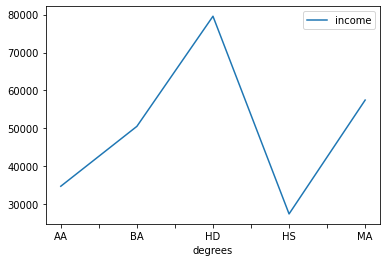

In [11]:
df_mass = p_df_mass[p_df_mass['income']>0]
df_mass['degrees'] = df_mass['education'].map(education)
df_mass2 = df_mass.loc[:,['degrees','income']]
mass_group = df_mass2.groupby(['degrees'])
pt_mass = mass_group.mean()
pt_mass.plot()

### Mississippi Example 

In [12]:
ci.one_percent_file,one_percent_data_file_miss
df5 = census.DataFrameWrapper(ci)
df5.fill_frame ([], ci.person_record, one_percent_data_file_miss, ci.one_percent_file, \
                'race','education','income','gender','age')
df5.save_frame(os.path.join(data_dir,'miss_pums_extract.csv'),header=True)
miss_NA = pd.read_csv(os.path.join(data_dir,'miss_pums_extract.csv'),
                   dtype=dt_dict)
p_df_miss = miss_NA.dropna(subset=['income'])
p_df_miss = p_df_miss[p_df_miss['education']>8]
p_df_miss = p_df_miss[p_df_miss['income'] > 0]
p_df_miss

,serial_no,race,education,income,gender,age
0,0000117,37,14,68000.0,1,48
1,0000117,37,14,50000.0,2,40
5,0000127,47,9,1000.0,2,22
9,0000218,37,10,21600.0,2,39
12,0000410,47,13,72000.0,1,36
...,...,...,...,...,...,...
28434,0999498,47,13,120000.0,1,43
28439,0999753,47,10,42000.0,1,37
28440,0999765,47,9,65000.0,1,49
28442,0999826,37,9,22000.0,1,38


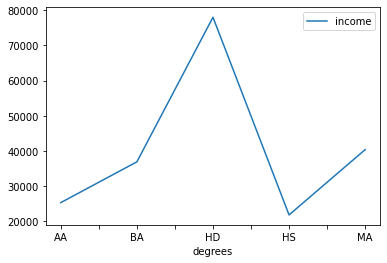

In [13]:
df_miss = p_df_miss[p_df_miss['income']>0]
df_miss['degrees'] = df_miss['education'].map(education)
df_miss2 = df_miss.loc[:,['degrees','income']]
miss_group = df_miss2.groupby(['degrees'])
pt_miss = miss_group.mean()
pt_miss.plot()

### Nevada Example 

In [14]:
ci.one_percent_file,one_percent_data_file_neva
df6 = census.DataFrameWrapper(ci)
df6.fill_frame ([], ci.person_record, one_percent_data_file_neva, ci.one_percent_file, \
                'race','education','income','gender','age')
df6.save_frame(os.path.join(data_dir,'neva_pums_extract.csv'),header=True)
neva_NA = pd.read_csv(os.path.join(data_dir,'neva_pums_extract.csv'),
                   dtype=dt_dict)
p_df_neva = neva_NA.dropna(subset=['income'])
p_df_neva = p_df_neva[p_df_neva['education']>8]
p_df_neva = p_df_neva[p_df_neva['income'] > 0]
p_df_neva

,serial_no,race,education,income,gender,age
1,0000218,47,9,31000.0,1,57
2,0000436,47,13,70000.0,1,49
7,0000574,47,10,14000.0,2,40
11,0000584,47,11,17800.0,1,50
14,0000764,47,10,44000.0,2,51
...,...,...,...,...,...,...
20054,0999146,47,11,18800.0,2,27
20055,0999379,47,11,300.0,2,64
20060,0999625,01,9,8000.0,1,22
20062,0999627,37,11,29600.0,2,35


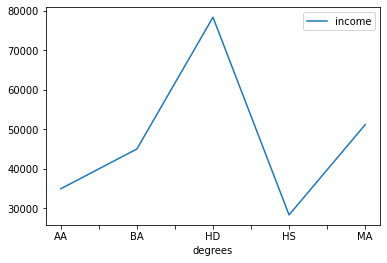

In [15]:
df_neva = p_df_neva[p_df_neva['income']>0]
df_neva['degrees'] = df_neva['education'].map(education)
df_neva2 = df_neva.loc[:,['degrees','income']]
neva_group = df_neva2.groupby(['degrees'])
pt_neva = neva_group.mean()
pt_neva.plot()

### New Jersey Example

In [16]:
ci.one_percent_file,one_percent_data_file_new_jer
df7 = census.DataFrameWrapper(ci)
df7.fill_frame ([], ci.person_record, one_percent_data_file_new_jer, ci.one_percent_file, \
                'race','education','income','gender','age')
df7.save_frame(os.path.join(data_dir,'new_jer_pums_extract.csv'),header=True)
new_jer_NA = pd.read_csv(os.path.join(data_dir,'new_jer_pums_extract.csv'),
                   dtype=dt_dict)
p_df_new_jer = new_jer_NA.dropna(subset=['income'])
p_df_new_jer = p_df_new_jer[p_df_new_jer['education']>8]
p_df_new_jer = p_df_new_jer[p_df_new_jer['income'] > 0]
p_df_new_jer

,serial_no,race,education,income,gender,age
1,0000117,47,13,85000.0,1,39
2,0000127,01,14,65000.0,1,30
4,0000141,47,9,19500.0,1,72
5,0000141,47,9,30000.0,2,54
6,0000141,47,10,3000.0,1,31
...,...,...,...,...,...,...
84107,0999918,47,11,44000.0,1,40
84108,0999918,47,9,20000.0,2,42
84111,0999965,47,11,11400.0,2,50
84113,0999979,47,15,317000.0,1,55


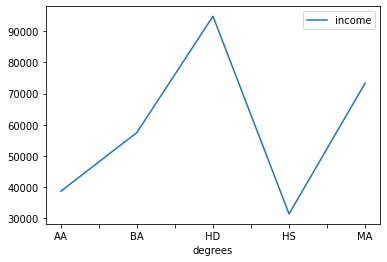

In [17]:
df_new_jer = p_df_new_jer[p_df_new_jer['income']>0]
df_new_jer['degrees'] = df_new_jer['education'].map(education)
df_new_jer2 = df_new_jer.loc[:,['degrees','income']]
new_jer_group = df_new_jer2.groupby(['degrees'])
pt_new_jer = new_jer_group.mean()
pt_new_jer.plot()

### New Mexico Example

In [18]:
ci.one_percent_file,one_percent_data_file_new_mex
df8 = census.DataFrameWrapper(ci)
df8.fill_frame ([], ci.person_record, one_percent_data_file_new_mex, ci.one_percent_file, \
                'race','education','income','gender','age')
df8.save_frame(os.path.join(data_dir,'new_mex_pums_extract.csv'),header=True)
new_mex_NA = pd.read_csv(os.path.join(data_dir,'new_mex_pums_extract.csv'),
                   dtype=dt_dict)
p_df_new_mex = new_mex_NA.dropna(subset=['income'])
p_df_new_mex = p_df_new_mex[p_df_new_mex['education']>8]
p_df_new_mex = p_df_new_mex[p_df_new_mex['income'] > 0]
p_df_new_mex

,serial_no,race,education,income,gender,age
0,0000117,47,16,100000.0,1,57
2,0000117,47,9,5000.0,1,21
4,0000117,47,10,5000.0,1,19
5,0000117,47,11,4500.0,2,70
9,0000436,01,9,32000.0,1,47
...,...,...,...,...,...,...
18232,0999146,47,11,14600.0,2,27
18233,0999243,47,11,46000.0,1,50
18234,0999243,47,9,18000.0,2,50
18235,0999243,47,10,6000.0,2,21


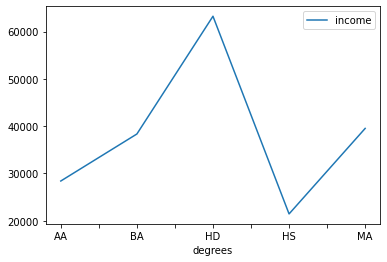

In [19]:
df_new_mex = p_df_new_mex[p_df_new_mex['income']>0]
df_new_mex['degrees'] = df_new_mex['education'].map(education)
df_new_mex2 = df_new_mex.loc[:,['degrees','income']]
new_mex_group = df_new_mex2.groupby(['degrees'])
pt_new_mex = new_mex_group.mean()
pt_new_mex.plot()

### Oregon Example

In [20]:
ci.one_percent_file,one_percent_data_file_ore
df9 = census.DataFrameWrapper(ci)
df9.fill_frame ([], ci.person_record, one_percent_data_file_ore, ci.one_percent_file, \
                'race','education','income','gender','age')
df9.save_frame(os.path.join(data_dir,'ore_pums_extract.csv'),header=True)
ore_NA = pd.read_csv(os.path.join(data_dir,'ore_pums_extract.csv'),
                   dtype=dt_dict)
p_df_ore = ore_NA.dropna(subset=['income'])
p_df_ore = p_df_ore[p_df_ore['education']>8]
p_df_ore = p_df_ore[p_df_ore['income'] > 0]
p_df_ore

,serial_no,race,education,income,gender,age
0,0000117,47,11,70000.0,2,45
3,0000117,47,9,4000.0,2,41
10,0000195,47,10,40000.0,2,52
13,0000218,47,9,13500.0,1,39
14,0000218,47,9,6500.0,2,37
...,...,...,...,...,...,...
34466,0999245,47,11,35000.0,1,43
34467,0999245,47,9,21000.0,2,43
34470,0999449,47,13,18600.0,1,43
34484,0999753,47,10,30000.0,2,35


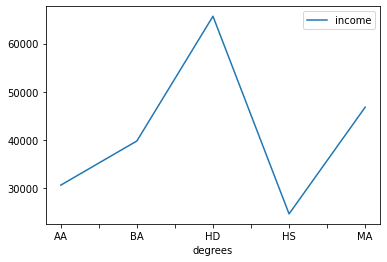

In [21]:
df_ore = p_df_ore[p_df_ore['income']>0]
df_ore['degrees'] = df_ore['education'].map(education)
df_ore2 = df_ore.loc[:,['degrees','income']]
ore_group = df_ore2.groupby(['degrees'])
pt_ore = ore_group.mean()
pt_ore.plot()

### Utah Example 

In [22]:
ci.one_percent_file,one_percent_data_file_utah
df10 = census.DataFrameWrapper(ci)
df10.fill_frame ([], ci.person_record, one_percent_data_file_utah, ci.one_percent_file, \
                'race','education','income','gender','age')
df10.save_frame(os.path.join(data_dir,'utah_pums_extract.csv'),header=True)
utah_NA = pd.read_csv(os.path.join(data_dir,'utah_pums_extract.csv'),
                   dtype=dt_dict)
p_df_utah = utah_NA.dropna(subset=['income'])
p_df_utah = p_df_utah[p_df_utah['education']>8]
p_df_utah = p_df_utah[p_df_utah['income'] > 0]
p_df_utah

,serial_no,race,education,income,gender,age
1,0000127,47,11,8400.0,1,24
2,0000127,47,11,700.0,1,19
3,0000218,47,11,73000.0,1,37
4,0000218,47,12,4500.0,2,36
8,0000436,47,13,33000.0,1,45
...,...,...,...,...,...,...
22507,0999379,47,11,20800.0,1,38
22510,0999449,37,13,20000.0,1,27
22515,0999627,47,10,4000.0,2,21
22519,0999627,47,11,5200.0,1,19


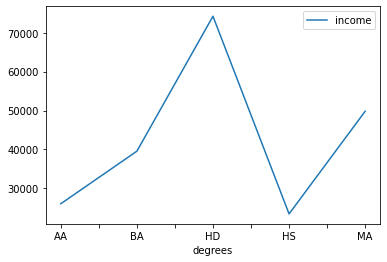

In [23]:
df_utah = p_df_utah[p_df_utah['income']>0]
df_utah['degrees'] = df_utah['education'].map(education)
df_utah2 = df_utah.loc[:,['degrees','income']]
utah_group = df_utah2.groupby(['degrees'])
pt_utah = utah_group.mean()
pt_utah.plot()

### Wisconsin Example

In [24]:
ci.one_percent_file,one_percent_data_file_wis
df11 = census.DataFrameWrapper(ci)
df11.fill_frame ([], ci.person_record, one_percent_data_file_wis, ci.one_percent_file, \
                'race','education','income','gender','age')
df11.save_frame(os.path.join(data_dir,'wis_pums_extract.csv'),header=True)
wis_NA = pd.read_csv(os.path.join(data_dir,'wis_pums_extract.csv'),
                   dtype=dt_dict)
p_df_wis = wis_NA.dropna(subset=['income'])
p_df_wis = p_df_wis[p_df_wis['education']>8]
p_df_wis

,serial_no,race,education,income,gender,age
0,0000117,47,9,18500.0,1,45
1,0000117,47,9,2900.0,2,36
5,0000127,47,9,0.0,1,39
6,0000127,47,9,0.0,2,37
10,0000134,36,14,22000.0,2,57
...,...,...,...,...,...,...
54392,0999657,47,9,0.0,2,79
54393,0999765,47,9,0.0,2,28
54394,0999820,47,9,37000.0,1,47
54395,0999820,47,13,31500.0,2,46


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


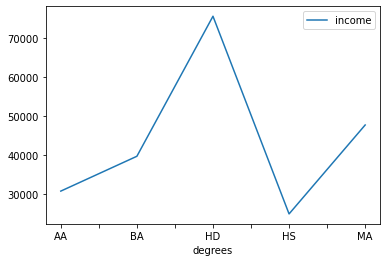

In [25]:
df_wis = p_df_wis[p_df_wis['income']>0]
df_wis['degrees'] = df_wis['education'].map(education)
df_wis2 = df_wis.loc[:,['degrees','income']]
wis_group = df_wis2.groupby(['degrees'])
pt_wis = wis_group.mean()
pt_wis.plot()

### Individual US States Counts

In [26]:
a = len(p_df_conn)
b = len(p_df_louis)
c = len(p_df_mass)
d = len(p_df_miss)
e = len(p_df_neva)
f = len(p_df_new_jer)
g = len(p_df_new_mex)
h = len(p_df_ore)
i = len(p_df_utah)
j = len(p_df_wis)

In [27]:
df_count = pd.DataFrame(np.array([[a], [b], [c], [d], [e], [f], [g], [h], [i], [j]]),
                    columns = ['Counts'],
                   index=['Connecticut', 'Louisiana', 'Massachusetts', 'Mississippi', 'Nevada', 
                            'New jersey', 'New Mexico', 'Oregon', 'Utah', 'Wisconsin'] 
                        )
df_count

,Counts
Connecticut,21275
Louisiana,23723
Massachusetts,41046
Mississippi,9964
Nevada,8500
New jersey,37091
New Mexico,6783
Oregon,14683
Utah,9486
Wisconsin,33989


#### Here we can see that Massachuetts and Wisconsin are among the biggest population in this dataframe, while Nevada and New Mexico are among the smallest in this dataframe. We have to taken account this for later as we'll see how the data has skewed the income level for each of these US states across education levels.  

## Educational Level to Degree Type: 

###    AA  = Associate degree
###    BA  = Bachelor's degree
###    MA  = Master's degree
###    HD  = Professional degree or Doctorate Degree(Higher Degree)
###    HS  = High School Dipoma  

#### Here, I download Matplotlib and make a line plot of all the US States's Educational level by their Income Value.

In [28]:
from matplotlib import pyplot as plt

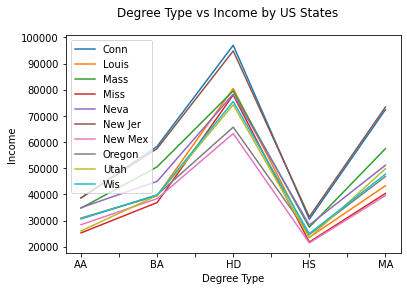

In [29]:
ax = pt_conn.plot()
pt_louis.plot(ax=ax)
pt_mass.plot(ax=ax)
pt_miss.plot(ax=ax)
pt_neva.plot(ax=ax)
pt_new_jer.plot(ax=ax)
pt_new_mex.plot(ax=ax)
pt_ore.plot(ax=ax)
pt_utah.plot(ax=ax)
pt_wis.plot(ax=ax)
plt.suptitle("Degree Type vs Income by US States")
plt.xlabel("Degree Type")
plt.ylabel("Income")
plt.legend(['Conn', 'Louis', 'Mass', 'Miss', 'Neva', 'New Jer', 'New Mex', 'Oregon', 'Utah', 'Wis'])
plt.rcParams["figure.figsize"] = (10,7)
#plt.xticks(rotation = 90)


#### As we can see in the above, while we can see some clear distinction between US States of their income level such as Connecticut and New Mexico, this line plot is a bit hard to read for any states that are close to each other or are intersecting off of each other. So this line plot is better for comparing fewer states and not necessarly all 10 US states. 

#### The reason why I like having each of the degrees being laid out the way they are on the x-axis and not based on the level of education level(i.e. HS < AA < BA < MA < HD) is because we want to compare education levels based on how differ from each other, hence a higher degree being between a bachelors and a high school degree since that is what we are looking at. 

#### In the code below, I try to make a different kind of plot, where we see more clearly with all 10 US States being included. I start doing this by making a new dataframe to include all US states as the column, and educational levels being the rows with each of the associated income levels in the matrix. 

In [30]:
from re import S
s_two =   pd.merge(pt_utah, pt_wis, left_index=True, right_index=True)
s_three = pd.merge(pt_ore, s_two, left_index=True, right_index=True)
s_four =  pd.merge(pt_new_mex, s_three, left_index=True, right_index=True)
s_five =  pd.merge(pt_new_jer, s_four, left_index=True, right_index=True)
s_six = pd.merge(pt_neva, s_five, left_index=True, right_index=True)
s_seven = pd.merge(pt_miss, s_six, left_index=True, right_index=True)
s_eight = pd.merge(pt_mass, s_seven, left_index=True, right_index=True)
s_nine = pd.merge(pt_louis, s_eight, left_index=True, right_index=True)
s_ten = pd.merge(pt_conn, s_nine, left_index=True, right_index=True)
s_ten.columns = ['Conn', 'Louis','Mass','Miss','Neva', 'New Jer','New Mex', 'Ore','Utah', 'Wis']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'income_y'} in the result is deprecated and will raise a MergeError in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'income_y'} in the result is deprecated and will raise a MergeError in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'income_y'} in the result is deprecated and will raise a MergeError in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'income_y'} in the result is deprecated and will raise a MergeError in a future version.
  # Remove the CWD from sys.path while we load stuff.


In [31]:
s_ten
#s_ten.drop(['AA'], axis = 0) Drop Row

,Conn,Louis,Mass,Miss,Neva,New Jer,New Mex,Ore,Utah,Wis
degrees,,,,,,,,,,
AA,38628.110420,30948.073620,34737.069032,25273.241455,34912.347697,38664.611783,28401.798165,30626.080402,26023.340708,30809.785534
BA,58357.464990,39466.137255,50528.398533,36876.597122,44977.394085,57513.411115,38347.330189,39795.829517,39544.662507,39713.974677
HD,97003.629403,80437.456140,79563.114162,78016.060606,78334.210526,94830.263835,63255.810277,65691.469816,74246.796537,75506.666667
HS,30492.127859,23569.230503,27439.637022,21772.583670,28292.490812,31406.016343,21440.633708,24651.577516,23410.626233,24980.054010
MA,72382.946887,43286.412301,57460.446456,40357.956349,51131.125000,73386.205788,39528.694737,46807.513455,49808.492063,47710.669935


#### Now that I have created a new dataframe, I can turn this into a bar plot where we have 10 US States next to each other based on the degree levels and how it compares alongside the income level. 

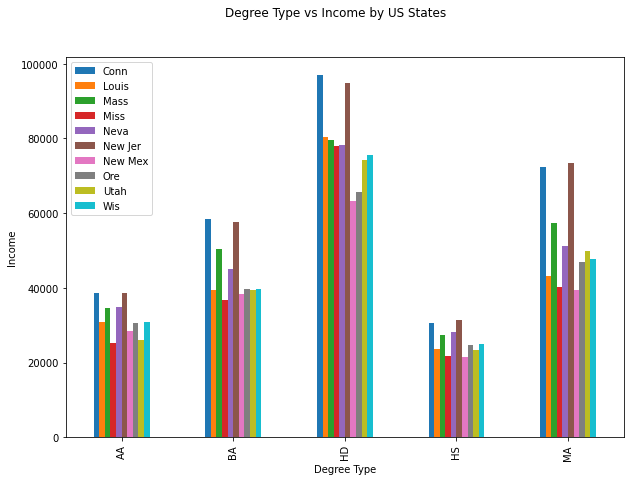

In [32]:
s_ten.plot(kind='bar')
plt.suptitle("Degree Type vs Income by US States")
plt.xlabel("Degree Type")
plt.ylabel("Income")
plt.rcParams["figure.figsize"] = (10,7)

#### As we can see, it looks cleaner now, and we can makes some form of analysis regarding this graph. Here, we clearly see that the US States with the highest peaks of income level is Connecticut and New Jersey, two states that are similar in each other due to their political ideology, the population count, and their location in the US. So it would make sense that these two states are similar to each other in terms of income levels accross each education levels. 

#### In terms of which US States is the lowest income State based on education levels, New Mexico and Louisiana being among the the lowest, which makes sense as there isn't really some well known university that's ranked in each of those states unlike Yale and Princeton with Connecuticut and New Jersey respectively. While I don't fully agree that we should judge which state has the better income ratio based on which US State has the more "iconic" university, the matter does seem to rather be consistent based on this data. New Mexico and Louisiana are also similar in terms of their political ideology and their population count too, at least according to the counts based on the pandas dataframe. 

#### US States that fall somewhere the minimum and the maximum such as Nevada and Wisconsin, also reflect each other based on similar income values across educational levels, as these two states have a mix of urbanization and rural locations. The cultures are balanced as well, since politically these two are battle ground States that could fall along any of the two party lines. 

#### This bar plot is also more clear in that we can see how much it differentiate from each education level, as obviously high schoolers are gonna make a lot less income than those with a higher degree. But what's interesting here is how there isn't a peak for any particular US State for those that only have a high schoo ldiploma when it comes to finding income values, while at a the highest degree level of a PhD, the peak becomes more obvious overall. 

#### I'd say that this bar plot is the main proof for this argument, as there can be many things to be said about how the education levels explain the differences in income state by state. Usually the more urban states tend to have the higher income value than the rural states with a few exceptions. Oregon in particular because while it is urban, it's not as urban as States liek Connecticut and New Jersey. So income can fluctuate here. 

#### Let's run another experiment, where we can compare US States that are similar to each other and see if the line plots line up between their education levels and their income values. For this, let's do 3 "Urban-Like" States like Connecticut, New Jersey, and Massachusetts. 

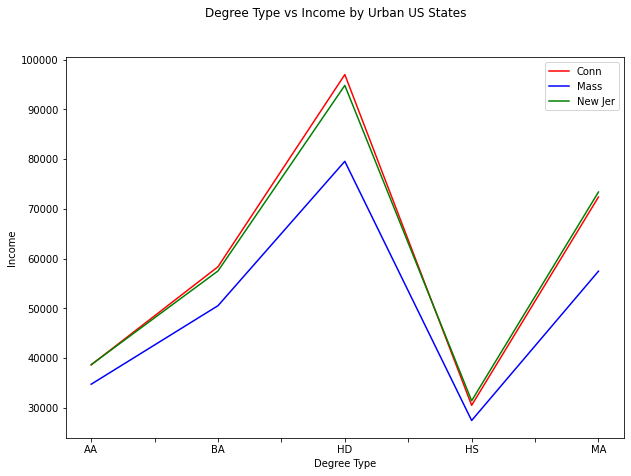

In [33]:
ax = pt_conn.plot(color = 'red')
pt_mass.plot(ax=ax, color = 'blue')
pt_new_jer.plot(ax=ax, color = 'green')
plt.suptitle("Degree Type vs Income by Urban US States")
plt.xlabel("Degree Type")
plt.ylabel("Income")
plt.legend(['Conn', 'Mass', 'New Jer'])
plt.rcParams["figure.figsize"] = (10,7)
#plt.xticks(rotation = 90)

#### We can see here that New Jersey and Connecuticut are very similar in that the line plot is practially next to each other, while Massachusetts is a bit lower than the other two US States. Despite this, I still say that all three are still similar to each other in education levels as well as income, since data is taken from those who have the desire to be apart of the survey. And it's expected that Massachusetts is lower than each of these two states because it has a higher population than the other two, with more people willing to be part of the survey and this skewing the data overall. Now let's do the same thing but for the more rural states, being Nevada, Louisiana, and Utah. 

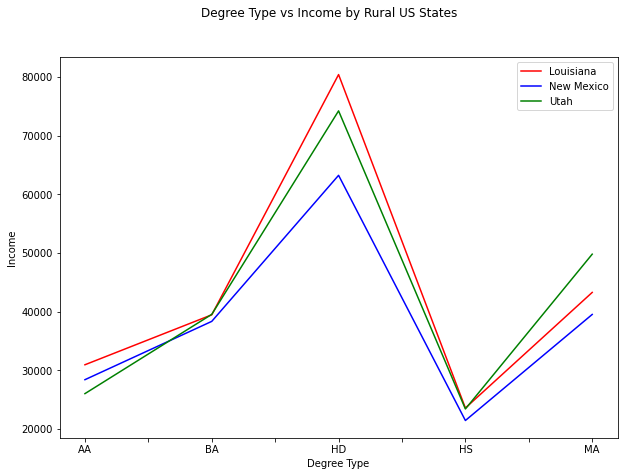

In [34]:
ax = pt_louis.plot(color = 'red')
pt_new_mex.plot(ax=ax, color = 'blue')
pt_utah.plot(ax=ax, color = 'green')
plt.suptitle("Degree Type vs Income by Rural US States")
plt.xlabel("Degree Type")
plt.ylabel("Income")
plt.legend(['Louisiana', 'New Mexico', 'Utah'])
plt.rcParams["figure.figsize"] = (10,7)
#plt.xticks(rotation = 90)

#### Here in this plot, each of the rural US States care comparative in income across educational backgrounds, with the possible exception being those who have higher degree(HD). Similar to the case for the more Urban States, there is more data to be gathered for Utah than Louisiana and New Mexico, thus skewing the peak lower overall. We also have to take into consideration that there aren't that many people with higher degrees in the world compared to a bachelors or a masters degree, so that would also expain in the differences of the peak.  

## Conclusion:

#### Overall, I would say that each of the types of degrees weather it may be ranging from a high school diploma to a PhD does differ greatly, with people getting more income the higher the level of degree they get. If we were to compare this state by state, it would appear that US States that are more urban(or have more urban cites) tend to have more people who have higher income accross all of the education levels. Even when it comes to US States that are similar to each other in terms of urbanization and cultural values, it would appear that income levels are similar to each other across educational levels as well. 

#### Part of the disparity in income levels between each of the US States has to do with the economy as well, where a person gets income through jobs, and jobs are varingly available based on the economy overall. States such as New Mexico aren't the best on an economic level, unlike Connecticut where there is gonna be more job opportunities on varing degree levels that would create such varing incoeme levels. That was reflected in the bar plot as was discussed. 

#### Along the same lines as the previous statements, usually the urban states have more accredited colleges than the rurual states, which also leads to the count of the degree holders, and higher odds of getting higher education and thus a greater income. And the lower the odds of someone getting a PhD or a pre-professional degree, the more skewed the peaks are across education levels. 

#### At the end of the day, each US State run differently, with each laws in place that create varing differences in income based on education level, weather it may be socially or economically depending on the cultures of the US Citizens. The biggest takeaway from this is that a degree is important no matter where you go, and the higher level you're degree is, the more likey your income will be higher overall for the most part. And I guess it doesn't really matter what US State you live in so long as you have the degree to begin with.  